SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64
Tiger and Berkshire are riskier than SP500.


SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

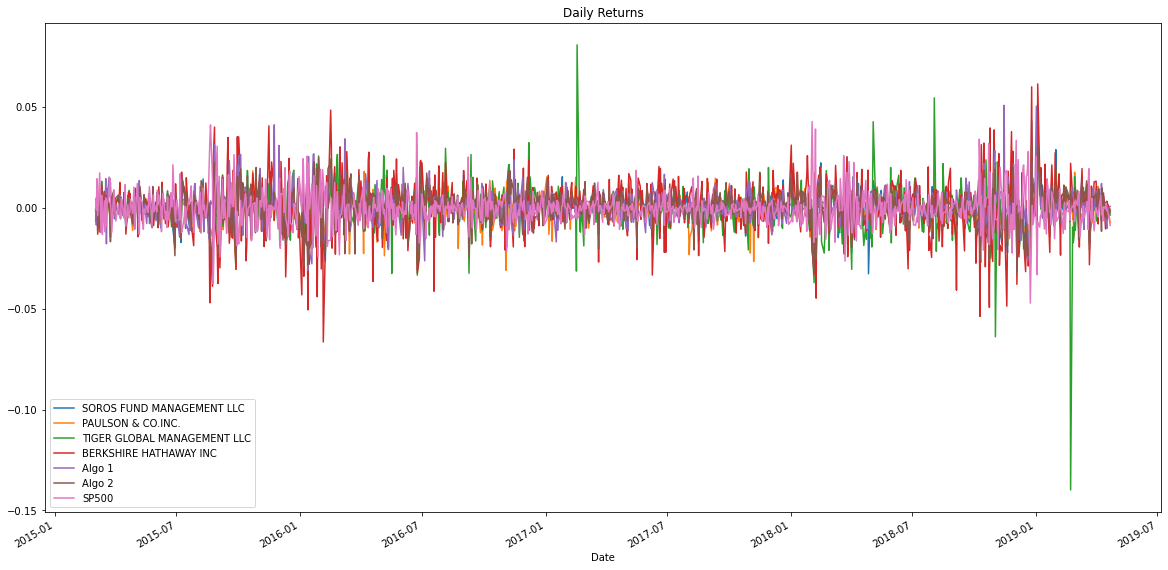

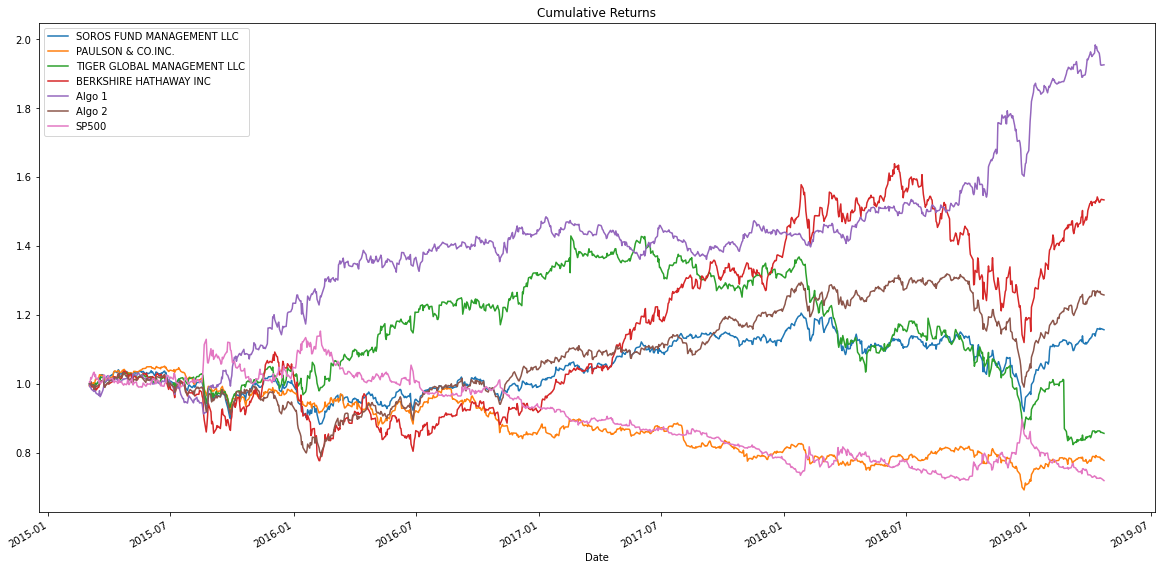

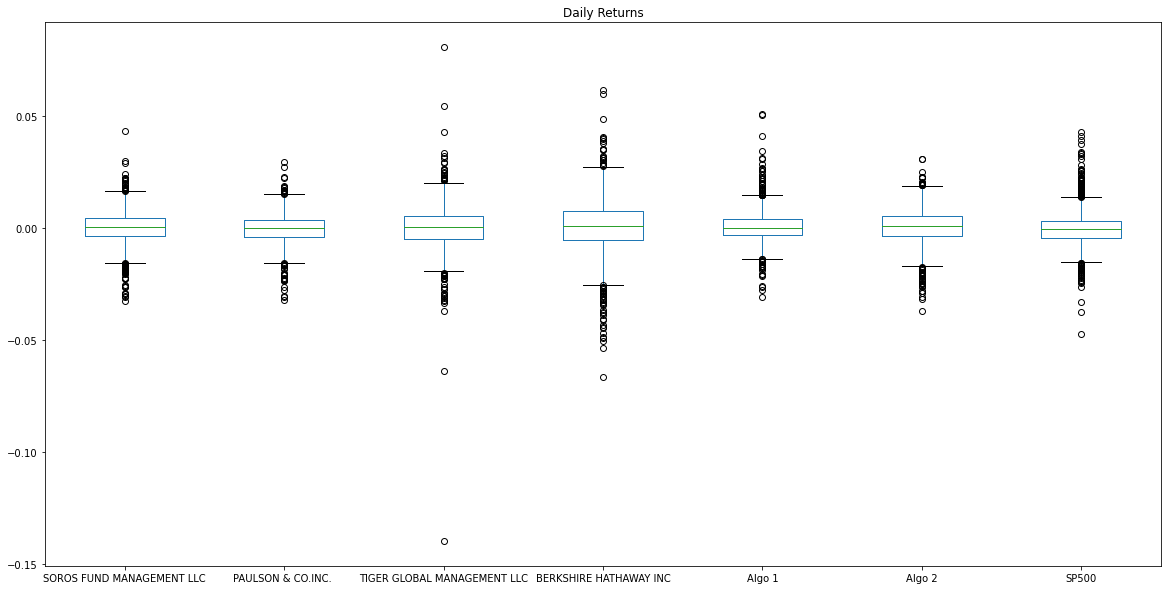

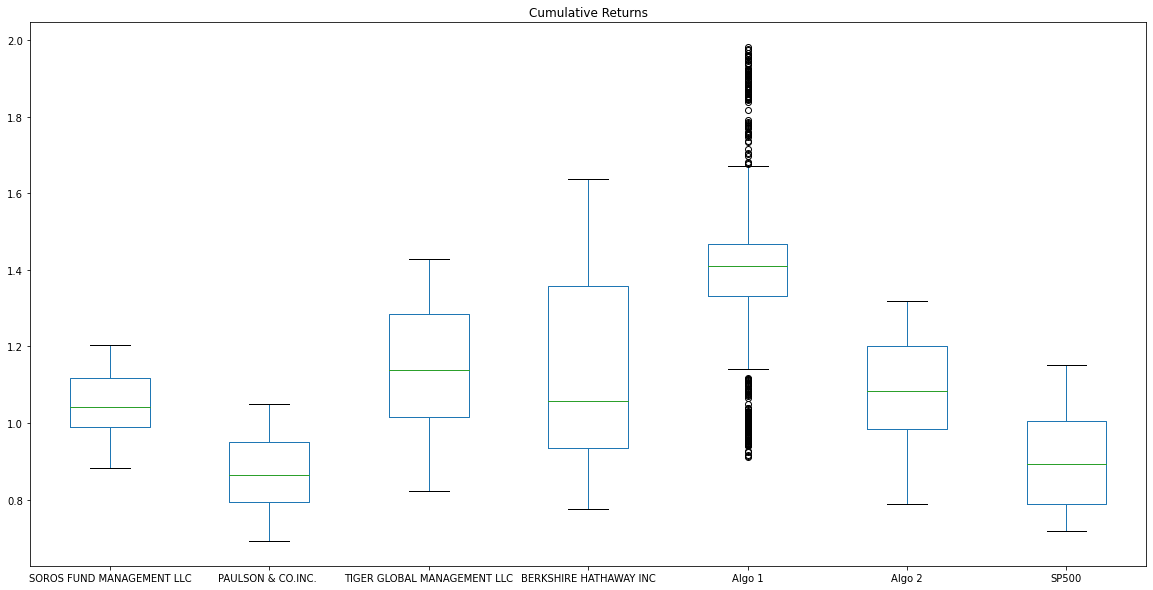

In [94]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# set file path
whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_returns_path = Path("Resources/sp500_history.csv")

whale_return = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_return = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_close_price = pd.read_csv(sp500_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# read a few rows of data
whale_return.head()
whale_return.tail()
algo_return.head()
algo_return.tail()
sp500_close_price.head()
sp500_close_price.tail()

# clean data - drop nulls and convert sp500 data in the ascending date order as well as calculate the daily return

whale_return.isnull().sum()
whale_return = whale_return.dropna()
whale_return.isnull().sum()

algo_return.isnull().sum()
algo_return = algo_return.dropna()
algo_return.isnull().sum()

sp500_close_price.sort_index(ascending=True)
sp500_close_price.tail()
sp500_close_price["Close"] = sp500_close_price["Close"].str.replace("$", "")
sp500_close_price = sp500_close_price.astype(float)
sp500_close_price.dtypes
sp500_return = sp500_close_price.pct_change()
sp500_return.isnull().sum()
sp500_return = sp500_return.dropna()
sp500_return.isnull().sum()
sp500_return = sp500_return.rename(columns={"Close":"SP500"})
sp500_return.head()

# combine all three portfolio returns into one data frame.

whale_algo_sp500_daily_return = pd.concat([whale_return, algo_return, sp500_return], axis = "columns", join = "inner")
whale_algo_sp500_daily_return.head()
whale_algo_sp500_daily_return.tail()

# performance analysis - plot daily return on each portfolio

whale_algo_sp500_daily_return.plot(figsize=(20,10), title="Daily Returns")

# performance analysis - calculate and plot the cumulative return on each portfolio

whale_algo_sp500_cumulative_return = (1 + whale_algo_sp500_daily_return).cumprod()
whale_algo_sp500_cumulative_return.plot(figsize=(20,10), title="Cumulative Returns")

# risk analysis - create a box plot for each portfolio

whale_algo_sp500_daily_return.plot.box(figsize=(20,10), title="Daily Returns")
whale_algo_sp500_cumulative_return.plot.box(figsize=(20,10), title="Cumulative Returns")

# risk analysis - calculate the daily standard deviation for each portfolio

daily_std = whale_algo_sp500_daily_return.std()

# risk analysis - determine which portfolio is riskier than SP500 by comparing its sd.

daily_std.sort_values(ascending=True)
print(daily_std)
print(f"Tiger and Berkshire are riskier than SP500.")

# risk abalysis - calculate annualized sd for each portfolio

annualized_daily_std = daily_std * np.sqrt(252)
annualized_daily_std.head()

        
